In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 09 

## Review: Lecture 04/05 (bootstrap)
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [2]:
# original sample

births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


**Task**
- define a function to generate a single bootstrap mean of the Maternal Age
- generate 3000 bootstrap means
- calculate the endpoints of the 95% confidence interval (using `percentile()`)
- generate a plot of the bootstrap mean distribution and the confidence interval (a yellow bar at y=0)

In [3]:
def one_bootstrap_mean():
    resample = births.sample() # our bootstrap sample
    return np.average(resample.column('Maternal Age')) # convert resample column Maternal Age to array, find average of array

In [4]:
# generate means from 3000 bootstrap samples
# call on one_bootstrap_mean() 3000x
# collect those 3000 bootstap means into an array 
# we'll add this array to a table later to generate a plot

num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [5]:
# get endpoints of 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

print(f"Left End: {left}")
print(f"Right End:{right}")

Left End: 26.896933560477002
Right End:27.54770017035775


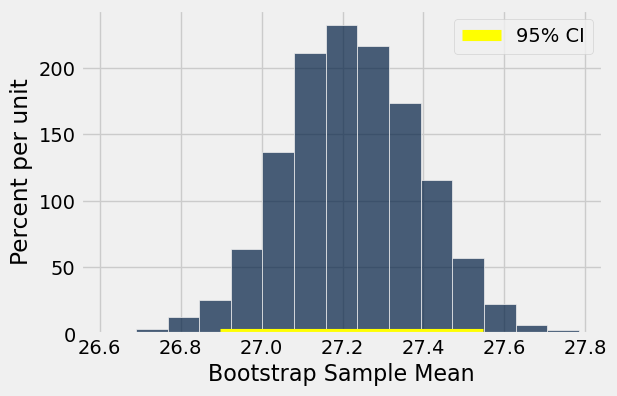

In [6]:
resampled_means = Table().with_columns('Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins = 15) # histogram
plots.plot([left, right], [0,0], color = "yellow", lw=8, label='95% CI') # overlayed histogram with a plot, for CI Interval
plots.legend();

## Method Based on CLT

**Tasks**

calculate the 
- sample size
- sample average
- sample SD

In [9]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")

Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.815360404190897


If we knew our population SD, we could get our sample average SD from 

$SD = ( \frac{\text{Population SD}}{\sqrt{\text{Sample_Size}}}) = \sigma_{sm} = ( \frac{\sigma_{pop}}{\sqrt{\text{Sample_Size}}})$


And then construct our confidence interval as $[\mu - 2*\sigma_{sm}, \mu + 2*\sigma_{sm}]$

But we don't have the population SD. ... therefore we replace the population SD with the sample SD.

**Task**
- calculate the SD of sample averages from the sample SD and the sample size
- calculate the confidence interval
- compare the CLT confidence interval to the bootstrap confidence interval

In [10]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / np.sqrt(sample_size) # or sample_size**0.5
estimated_SD_of_sample_average

0.16972373742299796

In [11]:
# Approximate 95% confidence interval for population mean

sample_average - 2 * estimated_SD_of_sample_average, sample_average + 2 * estimated_SD_of_sample_average

(26.888831911866099, 27.567726861558093)

---
back to slides

---

## SD of 0/1 population

**Tasks**
- generate a population of 10 containing zeros and ones with e.g. 4 ones and 6 zeros
- calculate the standard deviation of the population
- **Question:** Change the number of ones. What is the maximum standard deviation?

In [12]:
# population of size 10

number_of_ones = 4
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
# make_array(1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")
print(f"Population Average: {np.average(zero_one_population)}")

Population: [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
Standard Deviation: 0.49
Population Average: 0.4


In [13]:
number_of_ones = 5
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
# make_array(1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")
print(f"Population Average: {np.average(zero_one_population)}")

Population: [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
Standard Deviation: 0.5
Population Average: 0.5


In [14]:
number_of_ones = 10
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
# make_array(1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")
print(f"Population Average: {np.average(zero_one_population)}")

Population: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Standard Deviation: 0.0
Population Average: 1.0


In [15]:
number_of_ones = 0
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
# make_array(1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")
print(f"Population Average: {np.average(zero_one_population)}")

Population: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Standard Deviation: 0.0
Population Average: 0.0


**Task**
- Calculate the SDs for numbers of ones ranging from 0 to 10 (create a function)
- Make a scatter plot of the population SD vs the proportion of ones (create a table first)

In [16]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population
    that has 10 elements : number_of_ones with value 1 and (10 - number_of_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [19]:
possible_ones = np.arange(11) # (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [21]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones') 
# apply function sd_of_zero_one_population to 'Number of Ones' column, within zero_one_pop table
# generate an array, called sds
sds
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


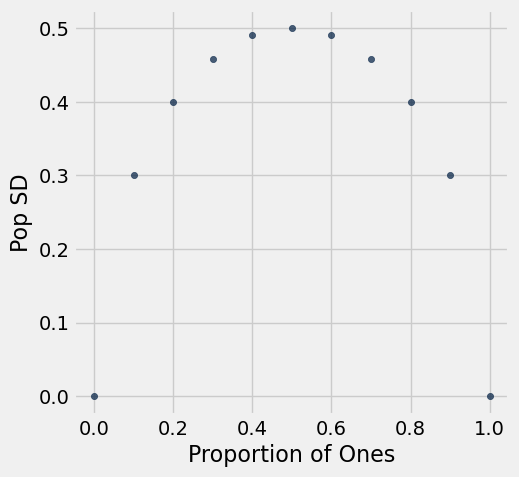

In [22]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')